# Things to check and questions:

* number of samples in each dataset
* number of columns in each dataset
* features with missing values
* duplicate rows in the white wine dataset
* number of unique values for quality in each dataset
* mean density of the red wine dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
white_df = pd.read_csv('winequality-white.csv', sep=';')
red_df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
print(f'There are {white_df.shape[0]} samples in the white wine dataset')
print(f'There are {red_df.shape[0]} samples in the red wine dataset')

There are 4898 samples in the white wine dataset
There are 1599 samples in the red wine dataset


In [4]:
print(f'There are {white_df.shape[1]} columns in both datasets')

There are 12 columns in both datasets


In [5]:
print("There are no features with missing values")

There are no features with missing values


In [6]:
# Look for duplicates
print(f'{red_df.duplicated().sum()} duplicates in the red wine dataset.')
print(f'{white_df.duplicated().sum()} duplicates in the whitewine dataset.')
print("This is a significant amount of duplicates, may need to be cleaned up.")

240 duplicates in the red wine dataset.
937 duplicates in the whitewine dataset.
This is a significant amount of duplicates, may need to be cleaned up.


In [7]:
# Setting up to merge the two data sets by creating a column to seperate the two dataframes
# Method 1
red_df['type'] = 'red'
# Method 2
color_white = np.repeat('white', len(white_df))
white_df['type'] = color_white
# Merge the two sets
wine_df = red_df.append(white_df, ignore_index=True)
print("Datasets Merged")

Datasets Merged


In [8]:
# Always save your data!
wine_df.to_csv('winequality_edited.csv', index=False)
print("Saved")

Saved


In [9]:
# Change the names of the columns
wine_df = wine_df.rename(columns=lambda x:x.replace(' ', '_'))
print("Column names updated")

Column names updated


In [10]:
# Find the mean of each type of wine
print(f"{wine_df.groupby(['type']).quality.mean()}")
print("On average the White Wines have a higher mean than the Red Wines")

type
red      5.636023
white    5.877909
Name: quality, dtype: float64
On average the White Wines have a higher mean than the Red Wines


In [11]:
# Add a column for acidity ranges so they can be put into a histogram
acidity_ranges = list(wine_df.describe().pH[3:9])
bin_labels = ['high', 'medium', 'mild', 'low']
wine_df['acidity_levels'] = pd.cut(wine_df.pH, acidity_ranges, labels=bin_labels)
wine_df.head()
print("Column added")

Column added


In [12]:
# The mean of the quality given to the wines grouped by categorical analysis of pH levels
round(wine_df.groupby('acidity_levels').quality.mean(), 2)

acidity_levels
high      5.78
medium    5.78
mild      5.85
low       5.86
Name: quality, dtype: float64

In [13]:
# Determine the average quality by alcohol content
alcohol_median = wine_df.alcohol.median()
# Select samples with alcohol content higher than the median
high_alcohol = wine_df.query(f'alcohol >= {alcohol_median}')
print(f'The average quality for high alcohol content wine is {round(high_alcohol.quality.mean(), 2)}')
# Select samples with alcohol content less than the median 
alcohol_median = wine_df.alcohol.median()
low_alcohol = wine_df.query(f'alcohol < {alcohol_median}')
print(f'The average quality for low alcohol content wine is {round(low_alcohol.quality.mean(), 2)}')

The average quality for high alcohol content wine is 6.15
The average quality for low alcohol content wine is 5.48


In [14]:
# Determine the average quality of wine by their residual sugar content
residual_sugar_median = wine_df.residual_sugar.median()
# Select samples with residual sugar content higher than the median
high_sugar = wine_df.query(f'residual_sugar >= {residual_sugar_median}')
print(f'The average quality for high residual sugar content wine is {round(high_sugar.quality.mean(), 2)}')
# Select samples with residual sugar content less than the median 
low_sugar = wine_df.query(f'residual_sugar < {residual_sugar_median}')
print(f'The average quality for low residual sugar content wine is {round(low_sugar.quality.mean(), 2)}')

The average quality for high residual sugar content wine is 5.83
The average quality for low residual sugar content wine is 5.81


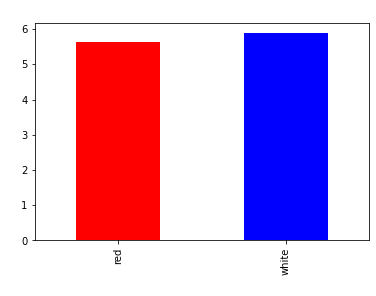

In [15]:
# create a bar graph for quality vs. color
labels_list = ['red', 'blue']
wine_averages = wine_df.groupby('type').quality.mean()
wine_averages.plot(kind='bar', color=labels_list)
plt.title('Average Wine Quality By Color', color='white')
plt.xlabel('Color', color="White")
plt.ylabel('Quality', color="White")
plt.show()

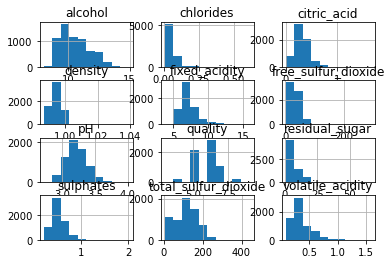

In [16]:
wine_df.hist();

In [17]:
# create a dataframe of the high v low sugar means
sugar_df = pd.DataFrame({'lab': ['high_sugar', 'low_sugar'], 'value': [round(high_sugar.quality.mean(), 2), round(low_sugar.quality.mean(), 2)]})

In [18]:
# create a dataframe of the high v low alcohol means
alcohol_df = pd.DataFrame({'lab': ['high_alcohol', 'low_alcohol'], 'value': [round(high_alcohol.quality.mean(), 2), round(low_alcohol.quality.mean(), 2)]})

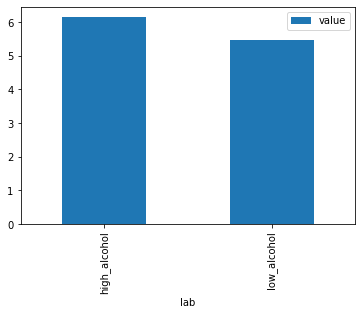

In [19]:
# plot of the alcohol df
alcohol_df.plot.bar(x='lab', y='value')

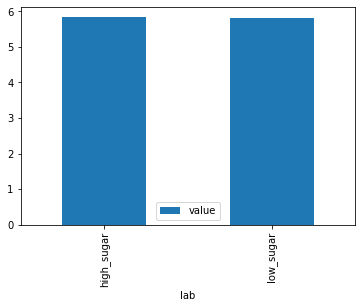

In [20]:
# plot of the sugar df
sugar_df.plot.bar(x='lab', y='value')

## Which types of wines&mdash;red or white&mdash;are associated with higher quality? 